<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix,roc_auc_score,f1_score,recall_score)
from sklearn.preprocessing import OrdinalEncoder
from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier


In [ ]:
df = pd.read_csv('/datasets/Churn.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


*Признаки
RowNumber — индекс строки в данных
CustomerId — уникальный идентификатор клиента
Surname — фамилия
CreditScore — кредитный рейтинг
Geography — страна проживания
Gender — пол
Age — возраст
Tenure — сколько лет человек является клиентом банка
Balance — баланс на счёте
NumOfProducts — количество продуктов банка, используемых клиентом
HasCrCard — наличие кредитной карты
IsActiveMember — активность клиента
EstimatedSalary — предполагаемая зарплата
Целевой признак
Exited — факт ухода клиента*

*Проверим данные на пропуски*

In [ ]:
df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [ ]:
df = df.dropna(subset = ['Tenure'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9091 non-null   int64  
 1   CustomerId       9091 non-null   int64  
 2   Surname          9091 non-null   object 
 3   CreditScore      9091 non-null   int64  
 4   Geography        9091 non-null   object 
 5   Gender           9091 non-null   object 
 6   Age              9091 non-null   int64  
 7   Tenure           9091 non-null   float64
 8   Balance          9091 non-null   float64
 9   NumOfProducts    9091 non-null   int64  
 10  HasCrCard        9091 non-null   int64  
 11  IsActiveMember   9091 non-null   int64  
 12  EstimatedSalary  9091 non-null   float64
 13  Exited           9091 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.0+ MB


В данных имеются пропуски в столбце (Tenure — сколько лет человек является клиентом банка). Удалим пропуски для корректной работы моделей.


*Преобразуем столбец Gender и Geography с помощью техники OHE*

In [ ]:
df = pd.get_dummies(df, columns=['Gender'], drop_first= True)

In [ ]:
df = pd.get_dummies(df, columns=['Geography'], drop_first= True)

*Разделим выборку на обучающую, валидационную и тестовую в соотношении 3:1:1*

*Для обучения и настройки модели не будем использовать столбцы:
RowNumber — индекс строки в данных
CustomerId — уникальный идентификатор клиента
Surname — фамилия.
Т.К они не важны в обучении.*

In [ ]:
features= df.drop(['Exited','RowNumber','CustomerId','Surname'],axis =1)
target = df['Exited']

In [ ]:
features_train,features_valid,target_train,target_valid =train_test_split(features,target,test_size = 0.4,random_state = 12345)

In [ ]:
features_valid,features_test,target_valid,target_test= train_test_split(features_valid,target_valid,test_size = 0.5,random_state = 12345)

*Проведем масштабировании данных методом стандартизации*

In [ ]:
numeric =['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

/tmp/ipykernel_203/2100902839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


***На этапе подготовки данных были удалены пропуски в данных, для корректного обучения моделей.
Так же данные были преобразованны техников OHE. Проведена масштабирование данных методом стандартизации.
Было проведено разделение на обучающую, валидационную и тестовую выборку.***

## Исследование задачи

*Иследуем и подсчитаем классы в целевом признаке*

0    0.796062
1    0.203938
Name: Exited, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

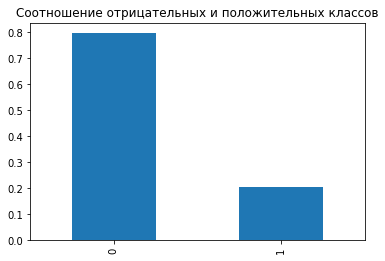

In [ ]:
class_frequency = df['Exited'].value_counts(normalize = True)
print(class_frequency)
class_frequency.plot(kind = 'bar',title = 'Соотношение отрицательных и положительных классов')
plt.show

<div class="alert alert-info">
    Подписал

Как видим в данных присутствует дисбаланс классов в отрицательную сторону. Метрика accuracy не подходит.

*Посмотрим матрицу ошибок и метрику f1_score для дерева решений,случайного леса и деревьев решений.*

In [ ]:
for depth in range(1,16):
    model = DecisionTreeClassifier(random_state=12345,max_depth=depth)# Обучаем случайный лес
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)

    print('depth =',depth,'f1_score',f1_score(target_valid,predicted_valid))

depth = 1 f1_score 0.0
depth = 2 f1_score 0.5304878048780488
depth = 3 f1_score 0.3726708074534161
depth = 4 f1_score 0.5414551607445008
depth = 5 f1_score 0.5140712945590994
depth = 6 f1_score 0.5606837606837607
depth = 7 f1_score 0.5773524720893142
depth = 8 f1_score 0.5413290113452188
depth = 9 f1_score 0.5429447852760736
depth = 10 f1_score 0.5151515151515152
depth = 11 f1_score 0.5128205128205129
depth = 12 f1_score 0.49287749287749283
depth = 13 f1_score 0.4811188811188812
depth = 14 f1_score 0.4713896457765667
depth = 15 f1_score 0.4932975871313673


In [ ]:
confusion_matrix(target_valid,predicted_valid)

array([[1256,  185],
       [ 193,  184]])

f1_score = 0.57, при гиперпараметрах max_depth=7
Исходя из матрицы ошибок видим, что модель предсказывает в основном отрицательные классы.


In [ ]:
model_logistic = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)# Обучаем логистическую регрессию
model_logistic.fit(features_train,target_train)
logistic_result = model_logistic.predict(features_valid)
confusion_matrix(target_valid,logistic_result)


array([[1394,   47],
       [ 301,   76]])

In [ ]:
f1_score(target_valid,logistic_result)

0.30400000000000005

Как видим из матрицы ошибок, модель так же пресказывает большинство отрицательных ответов. f1_score = 0,3

In [ ]:
#Исследуем случайный лес

for est in range(10, 151, 10):
    for depth in range(1, 16):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_forest = RandomForestClassifier(random_state=12345, n_estimators= 50 ,max_depth=depth)
        model_forest.fit(features_train,target_train)
        forest_result = model_forest.predict(features_valid)
        print("Глубина дерева:", depth,'n_estimators:',est,"f1_score:",f1_score(target_valid,forest_result))

Глубина дерева: 1 n_estimators: 10 f1_score: 0.0
Глубина дерева: 2 n_estimators: 10 f1_score: 0.1870503597122302
Глубина дерева: 3 n_estimators: 10 f1_score: 0.2336448598130841
Глубина дерева: 4 n_estimators: 10 f1_score: 0.40573770491803274
Глубина дерева: 5 n_estimators: 10 f1_score: 0.47195357833655704
Глубина дерева: 6 n_estimators: 10 f1_score: 0.5467625899280576
Глубина дерева: 7 n_estimators: 10 f1_score: 0.5563380281690141
Глубина дерева: 8 n_estimators: 10 f1_score: 0.5729166666666667
Глубина дерева: 9 n_estimators: 10 f1_score: 0.5831903945111492
Глубина дерева: 10 n_estimators: 10 f1_score: 0.5699658703071673
Глубина дерева: 11 n_estimators: 10 f1_score: 0.5743589743589743
Глубина дерева: 12 n_estimators: 10 f1_score: 0.5738539898132429
Глубина дерева: 13 n_estimators: 10 f1_score: 0.5748299319727891
Глубина дерева: 14 n_estimators: 10 f1_score: 0.5795644891122278
Глубина дерева: 15 n_estimators: 10 f1_score: 0.5761047463175123
Глубина дерева: 1 n_estimators: 20 f1_score: 0.

Лучший показатель f1_score: 0.58, при гиперпараметрах Глубина дерева: 9,n_estimators= 50

## Борьба с дисбалансом

*Для борьбы с дисбалансом классов использовали метод upsampled(увеличиваем количество положительного класса в данных),так как для задач классифицации необходим баланс классов стремящийся к доле 1:1.*

In [ ]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)



1    0.509964
0    0.490036
Name: Exited, dtype: float64


<AxesSubplot:title={'center':'Соотношение классов, после балансировки'}>

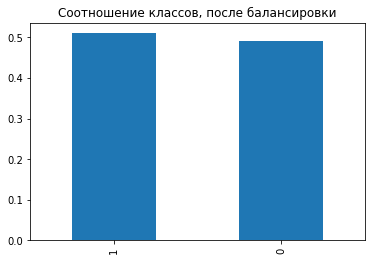

In [ ]:
class_target_upsampled = target_upsampled.value_counts(normalize = True)
print(class_target_upsampled)
class_target_upsampled.plot(kind = 'bar',title = 'Соотношение классов, после балансировки')

*Обучим различные модели с учетом устраненного дисбаланса*

In [ ]:
model = LogisticRegression(random_state = 12345,solver='liblinear')# Обучаем логистическую регрессию
model.fit(features_upsampled,target_upsampled)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print('roc_auc_score',roc_auc_score(target_valid, probabilities_one_valid))
print("F1:", f1_score(target_valid, predicted_valid))

roc_auc_score 0.7779006989325494
F1: 0.5085972850678734


После балансировки данных метрика f1_score, для модели логистической регрессии находится на низком уровне. Метрика auc roc находится на уровне выше, чем случайная модель, но не достаточно близка к 1. Модель не подходит для дальнейшего использования

In [ ]:
for depth in range(1,6):
    model_tree = DecisionTreeClassifier(random_state=12345,max_depth=depth)# Обучаем случайный лес
    model_tree.fit(features_upsampled,target_upsampled)
    predicted_valid_three = model_tree.predict(features_valid)
    probabilities_valid = model_tree.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    print('depth =',depth,'f1_score',f1_score(target_valid,predicted_valid_three),'roc_auc_score',roc_auc_score(target_valid, probabilities_one_valid))

depth = 1 f1_score 0.5065856129685917 roc_auc_score 0.7066517320531535
depth = 2 f1_score 0.5297619047619048 roc_auc_score 0.7580721463322148
depth = 3 f1_score 0.548936170212766 roc_auc_score 0.7949267105624042
depth = 4 f1_score 0.5461187214611872 roc_auc_score 0.8178983427733099
depth = 5 f1_score 0.5735449735449736 roc_auc_score 0.8396523192522141


После балансировки данных максимальное значение метрики f1_score, для модели дерева решений = 0.51. Максимальное значение метрики auc roc 0.84,что является неплохим показателем, но из-за низкого показателя f1_score, модель не подходит для дальнейшего использования

In [ ]:
best_metric = 0
best_depth = 0
for est in range(1,100,5):
    for depth in range(1,20,1):
        model_forest = RandomForestClassifier(random_state=12345, n_estimators= est,max_depth=depth)
        model_forest.fit(features_upsampled,target_upsampled)
        forest_result = model_forest.predict(features_valid)
        f = f1_score(target_valid,forest_result)
        if f > best_metric:
            best_metric = f
            best_depth = depth
            best_est = est
print("Глубина дерева:", best_depth, "Количество деревьев:", best_est, "f1_score=", best_metric)


Глубина дерева: 11 Количество деревьев: 86 f1_score= 0.6339066339066339


Оптимальным вариантом гиперпараметров можно считать max_depth = 19,n_estimators= 81.
F1= 0.63-находится на уровне удовлетворяющим задаче

*После работы над дизбалансом классов, оптимальные показатели метрик имеет модель случайного леса. Для финальной тестирования выбираем данную модель с гиперпараметроми  n_estimators= 81 ,max_depth=19)*

## Тестирование модели

In [ ]:
model_forest = RandomForestClassifier(random_state=12345, n_estimators= 81,max_depth=19)
model_forest.fit(features_upsampled,target_upsampled)
forest_result = model_forest.predict(features_test)
probabilities_valid = model_forest.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]
print("f1_score:", f1_score(target_test,forest_result),'roc_auc_score',roc_auc_score(target_test, probabilities_one_valid))

f1_score: 0.6012084592145015 roc_auc_score 0.8481246652227579


*Найдем Полноту, что бы посмотреть как точно модель предсказывает отток клиентов. Так же проверим модель на адекватность*

In [ ]:
recall_score(target_test,forest_result)

0.5669515669515669

Проверим модель на адекватность(сравним нашу модель с моделью предсказывающий одно значение)

In [ ]:
dummy_model = DummyClassifier(strategy='constant', constant=1)
dummy_model.fit(features_train, target_train)
dummy = dummy_model.predict(features_test)
f1_score(target_test,dummy)

0.3235023041474654

*Показатель f1_score у модели случайного леса выше показателя константной модели, модель проходит проверку на адекватность.
При достигнутых показателях f1_score, модель предсказывает верный отток клиентов с точностью 56%(recall = 0.56)*

*В ходе выполнения проекта была проделана работа:
-На этапе подготовки данных были удалены пропуски в данных, для корректного обучения моделей. Так же данные были преобразованны техников OHE. Проведена масштабирование данных методом стандартизации. Было проведено разделение на обучающую, валидационную и тестовую выборку.
-Проведено обучение модели без учета дисбаланса классов
-Проведена работа по борьбе с дисбалансом и повторном обучение различных моделей с достижением необходимых метрик.*

*В результате тестирования модели на тестовой выборке,были достигнуты метрики f1_score: 0.60 и roc_auc_score 0.84.*


<div class="alert alert-info">
Добавил сравнение моделей и  метрику recall.
Хотел задать вопрос касаемо метрики AUC-ROС. Каким образом ее анализировать. Нигде не нашел информации кроме того что здорово,если она стремится к 1 и выше 0.9. Заранее спасибо за ответ.